# MNIST

### fetch mnist

In [1]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

/Users/yra/miniconda3/envs/hands_on_ml_env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/yra/miniconda3/envs/hands_on_ml_env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
X, y = mnist['data'], mnist['target']

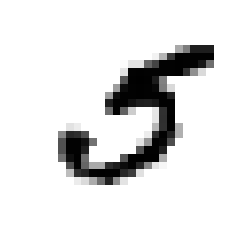

In [4]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

some_digit = X[36000]

some_digit_img = some_digit.reshape(28, 28)

plt.imshow(some_digit_img, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

In [5]:
y[36000]

5.0

In [6]:
X_train, y_train, X_test, y_test = X[:60000], y[60000], X[60000:], y[60000:]

In [7]:
import numpy as np

shuffled_idx = np.random.permutation(60000)
X_train, y_train = X_train[shuffled_idx], y[shuffled_idx]

## Binary classifier

In [61]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [62]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42, max_iter=5, tol=-np.infty)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
sgd_clf.predict([some_digit])

array([False])

### Binary classifier performanse

#### Cross-val

In [64]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.9384, 0.949 , 0.9615])

In [65]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [66]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.90985, 0.91025, 0.90885])

#### Confusion matrix

In [67]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [68]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[52952,  1627],
       [ 1395,  4026]])

#### Precession and recall

In [69]:
from sklearn.metrics import precision_score, recall_score

In [70]:
precision_score(y_train_5, y_train_pred)

0.7121882186449673

In [71]:
recall_score(y_train_5, y_train_pred)

0.7426674045379081

In [72]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7271085425320571

In [75]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [76]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)

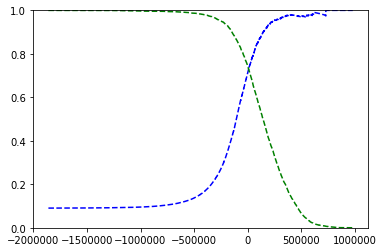

In [77]:
def plot_precision_recall_vs_thr(precision, recall, thresholds):
    plt.plot(thresholds, precision[:-1], 'b--', label='prec')
    plt.plot(thresholds, recall[:-1], 'g--', label='rec')
    plt.ylim([0, 1])
    
plot_precision_recall_vs_thr(precision, recall, thresholds)
plt.show()

In [78]:
y_train_pred_90 = (y_scores > 70000)

In [79]:
precision_score(y_train_5, y_train_pred_90)

0.8247623689982939

In [80]:
recall_score(y_train_5, y_train_pred_90)

0.6242390702822358

In [81]:
sgd_clf.decision_function([some_digit])

array([-51843.06092406])

#### ROC curve

In [82]:
from sklearn.metrics import roc_curve

fpr, tpr, thr = roc_curve(y_train_5, y_scores)

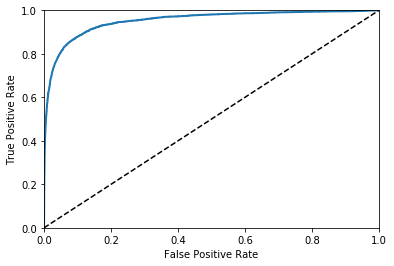

In [84]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [85]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9526797801618497

#### Random Forest Classifienr

In [88]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_score = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [89]:
y_scores_forest = y_probas_score[:, 1]
fpr_forest, tpr_forest, thr_forest = roc_curve(y_train_5, y_scores_forest)

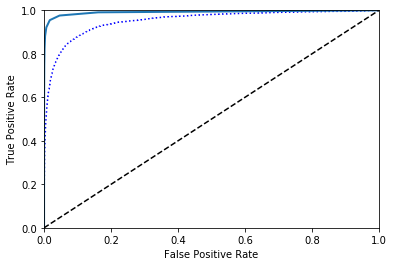

In [90]:
plt.plot(fpr, tpr, 'b:', label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.show()

In [91]:
roc_auc_score(y_train_5, y_scores_forest)

0.9916631763994198

In [96]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

In [97]:
precision_score(y_train_5, y_train_pred_forest)

0.9828155981493721

In [98]:
recall_score(y_train_5, y_train_pred_forest)

0.8229109020475927